In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import warnings
warnings.filterwarnings("ignore")
import os
print(os.listdir("../input"))
# Any results you write to the current directory are saved as output.

FileNotFoundError: [WinError 3] El sistema no puede encontrar la ruta especificada: '../input'

In [2]:
# Let's fill out missing data first

df = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [4]:
#fill missing vlaue on test[Cabin] columns 

test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [5]:
# His Pclass is 3, so let's put average fare of 3rd class.
savg = test['Fare'][test['Pclass']==3].mean()


In [6]:
test['Fare'].fillna(savg, inplace =True)

In [7]:
#just filled Embarked  'S' since most Embarked is 'S'

df['Embarked'].value_counts(sort=True, ascending=False)
df['Embarked'].fillna('S',inplace =True)

In [8]:
df[df["Age"].isna()]

# At least I don't see any characteristic to distinguish age...
# Then let's just fill average age

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


In [9]:
age = df['Age']
avgage = age.sum(axis = 0, skipna = True) /len(age)
df['Age'].fillna(avgage, inplace = True)

age1 = test['Age']
testavgage = age1.sum(axis = 0, skipna = True) /len(age1)
test['Age'].fillna(testavgage, inplace = True)



In [10]:
# It seems Cabin doesn't affect the result of any analysis since it's just seat number.
# so this time i'll just remove Cabin column
df['Cabin']

0              NaN
1              C85
2              NaN
3             C123
4              NaN
5              NaN
6              E46
7              NaN
8              NaN
9              NaN
10              G6
11            C103
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             D56
22             NaN
23              A6
24             NaN
25             NaN
26             NaN
27     C23 C25 C27
28             NaN
29             NaN
          ...     
861            NaN
862            D17
863            NaN
864            NaN
865            NaN
866            NaN
867            A24
868            NaN
869            NaN
870            NaN
871            D35
872    B51 B53 B55
873            NaN
874            NaN
875            NaN
876            NaN
877            NaN
878            NaN
879            C50
880            NaN
881            NaN
882         

In [11]:
df = df.drop('Cabin', axis = 1)
test = test.drop('Cabin', axis=1)

In [12]:
# Finally filled all missing data
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
df.sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
507,508,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,23.799293,0,0,111427,26.5500,S
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.000000,0,1,PC 17759,63.3583,C
816,817,0,3,"Heininen, Miss. Wendla Maria",female,23.000000,0,0,STON/O2. 3101290,7.9250,S
537,538,1,1,"LeRoy, Miss. Bertha",female,30.000000,0,0,PC 17761,106.4250,C
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.000000,2,2,W./C. 6608,34.3750,S
212,213,0,3,"Perkin, Mr. John Henry",male,22.000000,0,0,A/5 21174,7.2500,S
393,394,1,1,"Newell, Miss. Marjorie",female,23.000000,1,0,35273,113.2750,C
573,574,1,3,"Kelly, Miss. Mary",female,23.799293,0,0,14312,7.7500,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.000000,0,0,13509,26.5500,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.000000,0,0,349212,7.8958,S


In [15]:
def bar_chart(feature):
    survived = df[df['Survived']==1][feature].value_counts()
    dead = df[df['Survived']==0][feature].value_counts()
    df1 = pd.DataFrame([survived,dead])
    df1.index= ['Survived','Dead']
    df1.plot(kind='bar',stacked =True, figsize=(10,5))


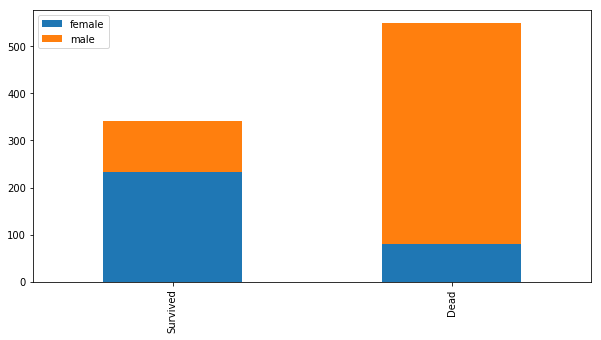

In [16]:
# female Survived more than male

bar_chart('Sex')

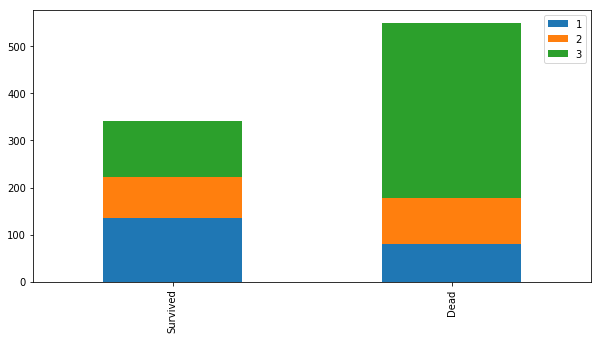

In [17]:
# First class guests Survived more than 2nd or 3rd.

bar_chart('Pclass')

In [18]:
# Data Preprocessing
combined = [df,test]

for i in combined:
    i['Title'] = i['Name'].str.extract(' ([A-Za-z]+)\.', expand =True)

df['Title'].value_counts()


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Lady          1
Don           1
Countess      1
Capt          1
Ms            1
Sir           1
Mme           1
Jonkheer      1
Name: Title, dtype: int64

In [19]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

In [20]:
# Change each title to number.

title_map = {'Mr' : 0, 'Mrs':1, 'Miss':2, 'Master':3, 'Don':3, 'Rev':3, 'Dr':3, 'Mme':3, 'Ms':3,
       'Major':3, 'Lady':3, 'Sir':3, 'Mlle':3, 'Col':3, 'Capt':3, 'Countess':3,
       'Jonkheer':3,'Dona' :3}
for i in combined:
    i['Title'] = i['Title'].map(title_map)

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [22]:
# Now we don't need whole name anymore. Remove name column

df.drop('Name',axis = 1, inplace =True)
test.drop('Name',axis = 1, inplace =True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,2
3,4,1,1,female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,male,35.0,0,0,373450,8.0500,S,0


In [23]:
# Change sex columns. Male equals 1, female equals 2 
sex_map = {'male' : 1, 'female' :2}
for i in combined:
    i['Sex'] = i['Sex'].map(sex_map)

df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,2,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,2,26.0,0,0,STON/O2. 3101282,7.9250,S,2
3,4,1,1,2,35.0,1,0,113803,53.1000,S,1
4,5,0,3,1,35.0,0,0,373450,8.0500,S,0


In [24]:
# Change age range. Let's count 0~13 as child, 14 ~ 20 as young, 
# 21 ~ 30 as adult, 31 ~ 55 as middle-age, 51~ as senior

for i in combined:
    i.loc[i["Age"] <= 13, 'Age'] = 0,
    i.loc[(i["Age"] > 13) & (i["Age"]  <=20),'Age'] =1,
    i.loc[(i["Age"] > 20) & (i["Age"]  <=30),'Age'] =2,
    i.loc[(i["Age"] > 30) & (i["Age"]  <=55),'Age'] =3,
    i.loc[i["Age"] >  55, 'Age'] = 4
    
            

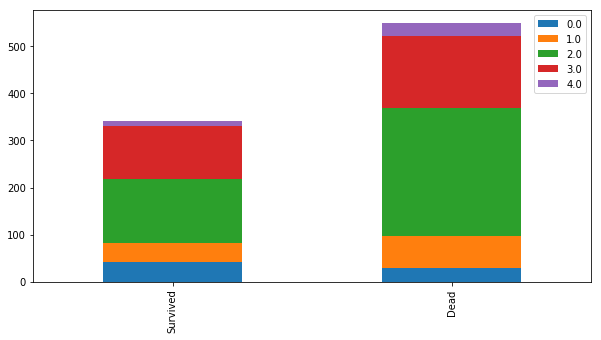

In [25]:
bar_chart('Age')

In [26]:
# Embarked -> number
embarked_map = {'S':0, 'C': 1, 'Q' :2}
for i in combined:
    i['Embarked'] = i['Embarked'].map(embarked_map)

In [27]:
# And we might be able to combine parch and sibsp columns, which makes you see data eaiser.
df['Familysize'] = df['SibSp'] + df['Parch']
test['Familysize'] = test['SibSp'] + test['Parch']

In [28]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Familysize
0,1,0,3,1,2.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,2,3.0,1,0,PC 17599,71.2833,1,1,1
2,3,1,3,2,2.0,0,0,STON/O2. 3101282,7.9250,0,2,0
3,4,1,1,2,3.0,1,0,113803,53.1000,0,1,1
4,5,0,3,1,3.0,0,0,373450,8.0500,0,0,0


In [29]:
# And we don't need Sibsp, Parch columns anymore, so just remove them.
# Plus Ticket, Passengerid columns too...
Drop= ['Ticket','SibSp','Parch']
train = df.drop(Drop, axis=1)
test = test.drop(Drop, axis=1)
train = train.drop(['PassengerId'],axis=1)
testset= test.drop(['PassengerId'],axis=1)

In [30]:
# modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

x = train.drop(['Survived'], axis=1)
y = train['Survived']
xtrain,xtest, ytrain,ytest = train_test_split(x,
    y,test_size = 0.25, random_state = 123)

xtrain.shape, ytrain.shape, xtest.shape, ytest.shape


((668, 7), (668,), (223, 7), (223,))

In [31]:
# 1. K-fold Classifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=123)

clf = KNeighborsClassifier(n_neighbors = 10) 
scoring = 'accuracy'
score = cross_val_score(clf, xtrain, ytrain, cv=k_fold, n_jobs=1, scoring=scoring)
print('K-fold score : ' ,score)

print('Average Accuracy  :' , round(np.mean(score)*100, 2))

K-fold score :  [0.67164179 0.74626866 0.76119403 0.74626866 0.79104478 0.70149254
 0.86567164 0.68656716 0.66666667 0.75757576]
Average Accuracy  : 73.94


In [32]:
# 2. Decision Tree 
clf = DecisionTreeClassifier()
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
score = cross_val_score(clf, xtrain, ytrain, cv=10, n_jobs=1, scoring=scoring)
print(score)

print('Average Accuracy :' , round(np.mean(score)*100, 2))

[0.79104478 0.74626866 0.73134328 0.7761194  0.73134328 0.88059701
 0.76119403 0.82089552 0.81818182 0.81818182]
Average Accuracy : 78.75


In [33]:
# 3. Random Forest
# I used 20 decision tree
clf = RandomForestClassifier(n_estimators=20, random_state = 101) 
score = cross_val_score(clf, xtrain, ytrain, cv=10, n_jobs=1, scoring=scoring)
print(score)
print('Average Accuracy :' , round(np.mean(score)*100, 2))

[0.82089552 0.76119403 0.74626866 0.79104478 0.76119403 0.85074627
 0.79104478 0.86567164 0.87878788 0.78787879]
Average Accuracy : 80.55


In [34]:
# 4. Naive Bayes

clf = GaussianNB()
score = cross_val_score(clf, xtrain, ytrain, cv=10, n_jobs=1, scoring=scoring)
print(score)
print('Average Accuracy :' , round(np.mean(score)*100, 2))


[0.7761194  0.85074627 0.73134328 0.73134328 0.74626866 0.8358209
 0.79104478 0.86567164 0.83333333 0.81818182]
Average Accuracy : 79.8


In [35]:
# 5. SVM
clf = SVC()
score = cross_val_score(clf, xtrain, ytrain, cv=10, n_jobs=1, scoring=scoring)
print(score)
print('Average Accuracy :' , round(np.mean(score)*100, 2))

[0.76119403 0.82089552 0.73134328 0.73134328 0.73134328 0.82089552
 0.80597015 0.8358209  0.77272727 0.75757576]
Average Accuracy : 77.69


In [36]:
# 6. Logistic Regression

clf = LogisticRegression()
score = cross_val_score(clf, xtrain, ytrain, cv=10, n_jobs=1, scoring=scoring)
print(score)
print('Average Accuracy :' , round(np.mean(score)*100, 2))

[0.80597015 0.82089552 0.79104478 0.68656716 0.74626866 0.85074627
 0.85074627 0.82089552 0.78787879 0.81818182]
Average Accuracy : 79.79


In [37]:
# 7. XGBOOST
from sklearn.model_selection import KFold,GridSearchCV
from xgboost import XGBClassifier
clf = XGBClassifier()
param_grid={'booster' :['gbtree'],
                 'silent':[True],
                 'max_depth':[5,6,8],
                 'min_child_weight':[1,3,5],
                 'gamma':[0,1,2,3],
                 'nthread':[4],
                 'colsample_bytree':[0.5,0.8],
                 'colsample_bylevel':[0.9],
                 'n_estimators':[50],
                 'objective':['binary:logistic'],
                 'random_state':[2]}

gcv=GridSearchCV(clf, param_grid=param_grid, cv=6, scoring='f1', n_jobs=4)

gcv.fit(xtrain,ytrain)


print('final params', gcv.best_params_) 
print('best score', gcv.best_score_)  



final params {'booster': 'gbtree', 'colsample_bylevel': 0.9, 'colsample_bytree': 0.8, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 50, 'nthread': 4, 'objective': 'binary:logistic', 'random_state': 2, 'silent': True}
best score 0.7937770710382048


In [38]:
# XGBoost shows the highest accuracy, so I'll use XGBoost model for test.
import sklearn.metrics as metrics
clf = XGBClassifier()
clf.fit(xtrain,ytrain)
test_prediction = clf.predict(xtest)  # Prediction with xtest
print('Test Accuracy : ', metrics.accuracy_score(test_prediction,ytest))

Test Accuracy :  0.8385650224215246


In [39]:
# Train all dataset in XGBoost and make a real prediciton on test
clf = XGBClassifier()
clf.fit(x,y)
score = cross_val_score(clf, x,y, cv=10, n_jobs=1, scoring=scoring)
print(score)
print('Average Accuracy :' , round(np.mean(score)*100, 2))

[0.76666667 0.81111111 0.75280899 0.8988764  0.8988764  0.82022472
 0.84269663 0.76404494 0.82022472 0.82954545]
Average Accuracy : 82.05


In [40]:
# Prediciton by XGBoost

result = clf.predict(testset)

result[0:10,]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [41]:
import collections, numpy

collections.Counter(result)

submission= pd.DataFrame({
    "PassengerId" : test["PassengerId"],
    'Survived' : result
})

submission.to_csv('submission.csv',index=False)
